In [7]:
# 📌 Cell 1 — Import Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [8]:
# 📌 Cell 2 — Dataset paths

DATASET_DIR = r"C:\Users\LENOVO\Downloads\milestone 3 Dataset"
TRAIN_DIR = os.path.join(DATASET_DIR, "Train")
TEST_DIR = os.path.join(DATASET_DIR, "Test")
TEST_CSV = os.path.join(DATASET_DIR, "Test.csv")

In [9]:
# 📌 Cell 3 — Verify folders

print("Dataset Folder Exists:", os.path.exists(DATASET_DIR))
print("Train Folder Exists:", os.path.exists(TRAIN_DIR))
print("Test Folder Exists:", os.path.exists(TEST_DIR))
print("Test CSV Exists:", os.path.exists(TEST_CSV))

Dataset Folder Exists: True
Train Folder Exists: True
Test Folder Exists: True
Test CSV Exists: True


In [10]:
# 📌 Cell 4 — Train & Validation Generators

IMG_SIZE = (64, 64)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    validation_split=0.15
)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 33337 images belonging to 43 classes.
Found 5872 images belonging to 43 classes.


In [14]:
# 📌 Cell 5 — Load Test.csv & Fix Paths

test_df = pd.read_csv(TEST_CSV)

# Convert ClassId → string (required by Keras)
test_df["ClassId"] = test_df["ClassId"].astype(str)

# Extract only filename from "Test/00000.png"
test_df["Filename"] = test_df["Path"].apply(lambda x: os.path.basename(x))

# Build correct full path to image
test_df["Filepath"] = test_df["Filename"].apply(
    lambda x: os.path.join(TEST_DIR, x)
)

In [15]:
# 📌 Cell 6 — Debug path check

print("🔍 Debug Path Check:")
for i in range(10):
    fp = test_df["Filepath"].iloc[i]
    print(fp, "→ Exists:", os.path.exists(fp))

🔍 Debug Path Check:
C:\Users\LENOVO\Downloads\milestone 3 Dataset\Test\00000.png → Exists: True
C:\Users\LENOVO\Downloads\milestone 3 Dataset\Test\00001.png → Exists: True
C:\Users\LENOVO\Downloads\milestone 3 Dataset\Test\00002.png → Exists: True
C:\Users\LENOVO\Downloads\milestone 3 Dataset\Test\00003.png → Exists: True
C:\Users\LENOVO\Downloads\milestone 3 Dataset\Test\00004.png → Exists: True
C:\Users\LENOVO\Downloads\milestone 3 Dataset\Test\00005.png → Exists: True
C:\Users\LENOVO\Downloads\milestone 3 Dataset\Test\00006.png → Exists: True
C:\Users\LENOVO\Downloads\milestone 3 Dataset\Test\00007.png → Exists: True
C:\Users\LENOVO\Downloads\milestone 3 Dataset\Test\00008.png → Exists: True
C:\Users\LENOVO\Downloads\milestone 3 Dataset\Test\00009.png → Exists: True


In [16]:
# 📌 Cell 7 — Test Generator

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepath",
    y_col="ClassId",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode="categorical"
)

Found 12630 validated image filenames belonging to 43 classes.


In [17]:
# 📌 Cell 8 — Build CNN Model

num_classes = train_gen.num_classes

model = Sequential([
    
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.4),

    Dense(num_classes, activation='softmax')
])

model.summary()

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,285,099 (4.90 MB)

 Trainable params: 1,284,651 (4.90 MB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
# 📌 Cell 9 — Compile Model

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
# 📌 Cell 10 — Train Model

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    verbose=1
)

Epoch 1/15
521/521 ━━━━━━━━━━━━━━━━━━━━ 1609s 3s/step - accuracy: 0.3852 - loss: 2.2035 - val_accuracy: 0.3168 - val_loss: 3.0973
Epoch 2/15
521/521 ━━━━━━━━━━━━━━━━━━━━ 884s 2s/step - accuracy: 0.6765 - loss: 1.0025 - val_accuracy: 0.6914 - val_loss: 1.0519
Epoch 3/15
521/521 ━━━━━━━━━━━━━━━━━━━━ 767s 1s/step - accuracy: 0.8167 - loss: 0.5511 - val_accuracy: 0.7401 - val_loss: 0.9325
Epoch 4/15
521/521 ━━━━━━━━━━━━━━━━━━━━ 752s 1s/step - accuracy: 0.8756 - loss: 0.3718 - val_accuracy: 0.8551 - val_loss: 0.5304
Epoch 5/15
521/521 ━━━━━━━━━━━━━━━━━━━━ 750s 1s/step - accuracy: 0.9107 - loss: 0.2715 - val_accuracy: 0.8711 - val_loss: 0.5275
Epoch 6/15
521/521 ━━━━━━━━━━━━━━━━━━━━ 715s 1s/step - accuracy: 0.9279 - loss: 0.2170 - val_accuracy: 0.8840 - val_loss: 0.4683
Epoch 7/15
521/521 ━━━━━━━━━━━━━━━━━━━━ 719s 1s/step - accuracy: 0.9408 - loss: 0.1818 - val_accuracy: 0.8927 - val_loss: 0.4309
Epoch 8/15
521/521 ━━━━━━━━━━━━━━━━━━━━ 727s 1s/step - accuracy: 0.9487 - loss: 0.1562 - val_acc

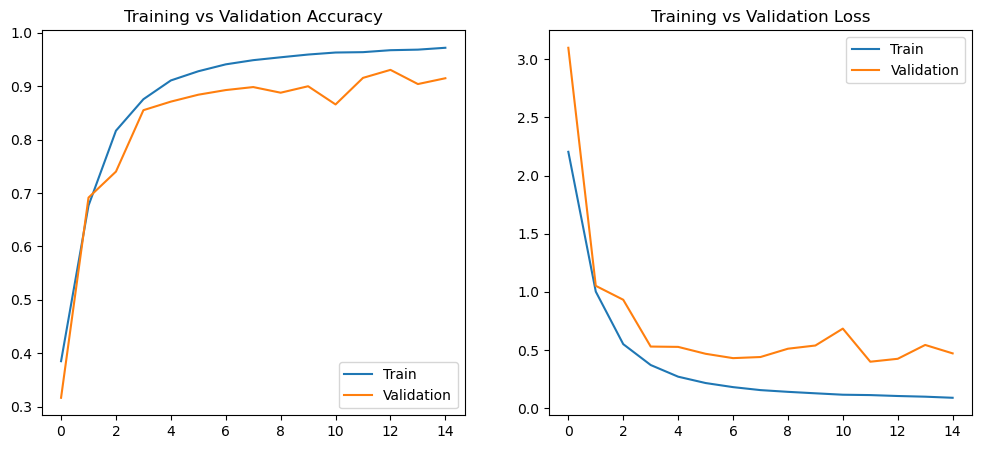

In [24]:
# 📌 Cell 11 — Plot training graphs

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.legend(["Train", "Validation"])

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.legend(["Train", "Validation"])

plt.show()

In [25]:
# 📌 Cell 12 — Evaluate on test set

test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)

198/198 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.9644 - loss: 0.1710
Test Accuracy: 0.9643705487251282


In [27]:
# 📌 Cell 13 — Classification report

from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes

print(classification_report(y_true, y_pred_classes))

198/198 ━━━━━━━━━━━━━━━━━━━━ 56s 281ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.94      0.99      0.97       720
           2       1.00      0.99      0.99       660
           3       0.98      0.98      0.98       420
           4       1.00      0.95      0.97       690
           5       1.00      1.00      1.00       720
           6       0.99      1.00      1.00       270
           7       0.91      1.00      0.95       210
           8       0.99      1.00      1.00       150
           9       1.00      0.91      0.95       360
          10       0.94      0.91      0.92       390
          11       0.98      0.98      0.98        60
          12       1.00      0.96      0.98       750
          13       0.84      1.00      0.91        90
          14       1.00      0.69      0.82        90
          15       1.00      0.76      0.86       120
          16       0.98      0.98    

In [28]:
# 📌 Cell 14 — Save model

model.save("RoadSigns_CNN_Model.h5")
print("Model saved successfully!")

Model saved successfully!
